IMPORTING

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [3]:
prostate = pd.read_csv("C:/Users/e u n o i a/Downloads/Prostate_Cancer.xls")

DATA ANALYSIS

In [4]:
prostate.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


Beningn Tumour: Noncancerous


Malignant Tumour: Cancerous

In [5]:
prostate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [6]:
prostate.describe

<bound method NDFrame.describe of      id diagnosis_result  radius  texture  perimeter  area  smoothness  \
0     1                M      23       12        151   954       0.143   
1     2                B       9       13        133  1326       0.143   
2     3                M      21       27        130  1203       0.125   
3     4                M      14       16         78   386       0.070   
4     5                M       9       19        135  1297       0.141   
..  ...              ...     ...      ...        ...   ...         ...   
95   96                M      23       16        132  1264       0.091   
96   97                B      22       14         78   451       0.105   
97   98                B      19       27         62   295       0.102   
98   99                B      21       24         74   413       0.090   
99  100                M      16       27         94   643       0.098   

    compactness  symmetry  fractal_dimension  
0         0.278     0.242     

DATA VISUALISATION

<AxesSubplot:xlabel='diagnosis_result', ylabel='count'>

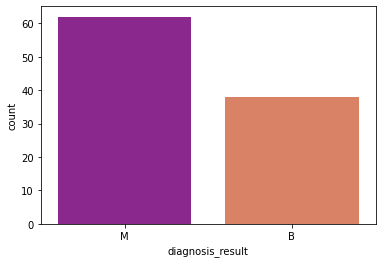

In [10]:
sns.countplot(x = "diagnosis_result", data = prostate, palette="plasma")

AxesSubplot(0.125,0.125;0.775x0.755)


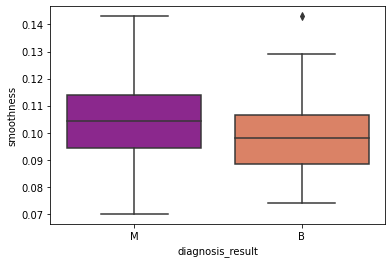

In [32]:
print(sns.boxplot(x = prostate["diagnosis_result"], y = prostate['smoothness'], palette="plasma" ) )

AxesSubplot(0.125,0.125;0.775x0.755)


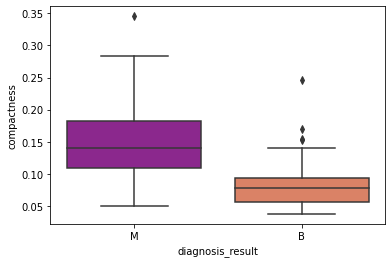

In [26]:
print(sns.boxplot(x = prostate["diagnosis_result"], y = prostate['compactness'], palette="plasma" )) 

AxesSubplot(0.125,0.125;0.775x0.755)


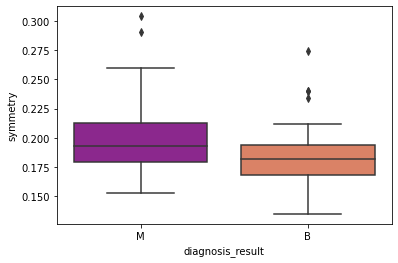

In [27]:
print(sns.boxplot(x = prostate["diagnosis_result"], y = prostate['symmetry'], palette="plasma" ))

AxesSubplot(0.125,0.125;0.775x0.755)


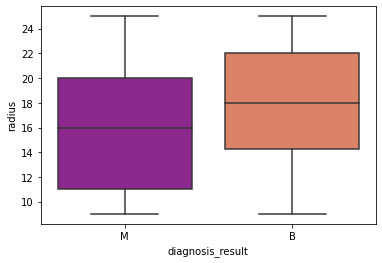

In [29]:
print(sns.boxplot(x = prostate["diagnosis_result"], y = prostate['radius'], palette="plasma" ) )

AxesSubplot(0.125,0.125;0.775x0.755)


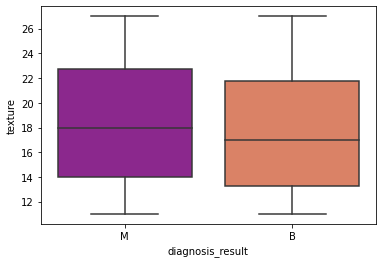

In [30]:
print(sns.boxplot(x = prostate["diagnosis_result"], y = prostate['texture'], palette="plasma" ) )

AxesSubplot(0.125,0.125;0.775x0.755)


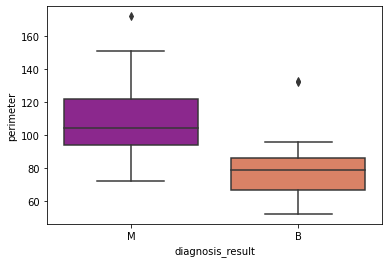

In [31]:
print(sns.boxplot(x = prostate["diagnosis_result"], y = prostate['perimeter'], palette="plasma" ) )

AxesSubplot(0.125,0.125;0.775x0.755)


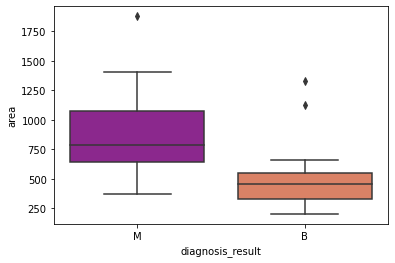

In [33]:
print(sns.boxplot(x = prostate["diagnosis_result"], y = prostate['area'], palette="plasma" ) )

C:\Users\e u n o i a\AppData\Local\Temp\ipykernel_107640\2597222187.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewness=prostate.skew().sort_values()


Text(0.5, 0, 'Skewness')

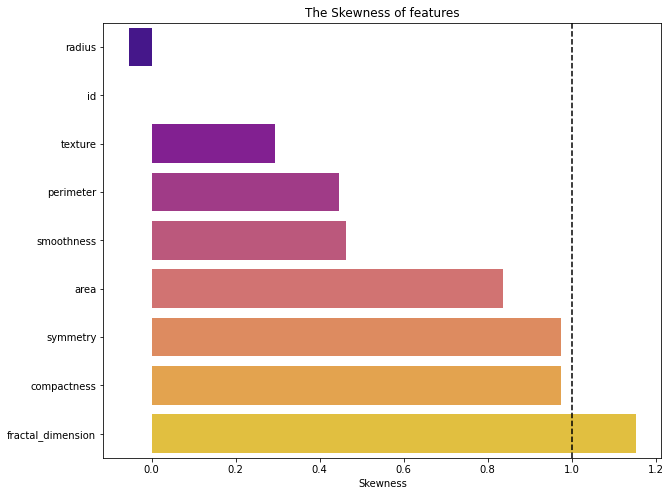

In [34]:
plt.figure(figsize=(10,8))
skewness=prostate.skew().sort_values()
sns.barplot(x=skewness,y=skewness.index, palette= "plasma").set_title('The Skewness of features')
plt.axvline(x=1, color='black', linestyle='--')
plt.xlabel('Skewness')

In [35]:
prostate.columns

Index(['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension'],
      dtype='object')

In [36]:
del prostate["id"]

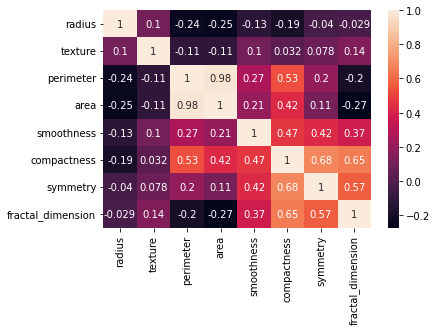

In [41]:
plt.Figure(figsize=(15,15))
sns.heatmap(prostate.corr(), annot=True)
plt.show()

TRAINING MODEL

In [52]:
array = prostate.values
random.shuffle(array)
random.shuffle(array)
random.shuffle(array)
X = array[:,1:9]
Y = array[:,0]
X=X.astype('float')
validation_size = 0.15
seed = 101
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = validation_size, random_state = seed)

In [53]:
pro = DecisionTreeClassifier()
pro.fit(X_train, Y_train)
pro = pro.predict(X_test)

REPORT

In [54]:
report = classification_report(Y_test,pro)
print(report)

              precision    recall  f1-score   support

           B       1.00      1.00      1.00         4
           M       1.00      1.00      1.00        11

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [56]:
preds = pd.DataFrame({'y_pred': pro, 'y_test':Y_test})
preds = preds.sort_values(by='y_test')
preds = preds.reset_index()

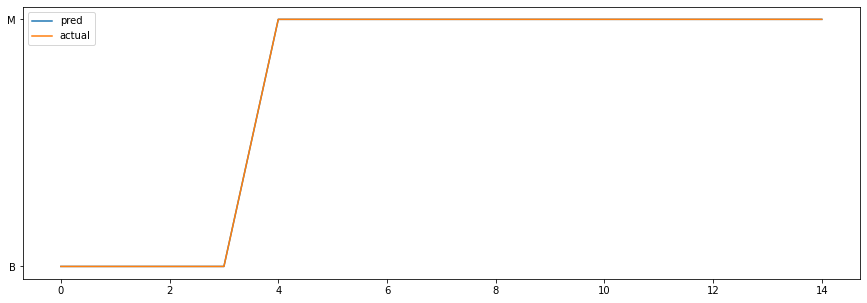

In [57]:
plt.figure(figsize=(15, 5))
plt.plot(preds['y_pred'], label='pred')
plt.plot(preds['y_test'], label='actual')
plt.legend()
plt.show()